# 1. Advection Equation

In [353]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dati_FTCS = np.loadtxt("l2norm_FTCS.dat",dtype="str")
dati_LF = np.loadtxt("l2norm_LAX.dat",dtype="str")
dati_lf = np.loadtxt("l2norm_LEAPFROG.dat",dtype="str")
dati_LW = np.loadtxt("l2norm_LAXWENDROFF.dat",dtype="str")

tmFTCS = []
tmLF = []
tmlf = []
tmLW = []
l2nFTCS = []
l2nLF = []
l2nlf = []
l2nLW = []
for i in range(len(dati_FTCS[:,0])-1):
    tmFTCS.append(float(dati_FTCS[i+1,0]))
    l2nFTCS.append(float(dati_FTCS[i+1,1]))
for i in range(len(dati_LF[:,0])-1):
    tmLF.append(float(dati_LF[i+1,0]))
    l2nLF.append(float(dati_LF[i+1,1]))
for i in range(len(dati_lf[:,0])-1):
    tmlf.append(float(dati_lf[i+1,0]))
    l2nlf.append(float(dati_lf[i+1,1]))
for i in range(len(dati_LW[:,0])-1):
    tmLW.append(float(dati_LW[i+1,0]))
    l2nLW.append(float(dati_LW[i+1,1]))
tm = []
tm.append(tmFTCS)
tm.append(tmLF)
tm.append(tmlf)
tm.append(tmLW)
norm = []
norm.append(l2nFTCS)
norm.append(l2nLF)
norm.append(l2nlf)
norm.append(l2nLW)

print(len(tm),len(norm))

4 4


In [3]:
import os

print(os.getcwd())

os.makedirs('./frames')      # CREATES THE DIRECTORY "immagini"

os.listdir('./')

/home/sandokan/galaxydyn/numerical_relativity


FileExistsError: [Errno 17] File exists: './frames'

In [219]:
N=101
dx=10/(N-1)
T=20
print(T/dx)
m = 250
Cf = T/dx/m
Cf

200.0


0.8

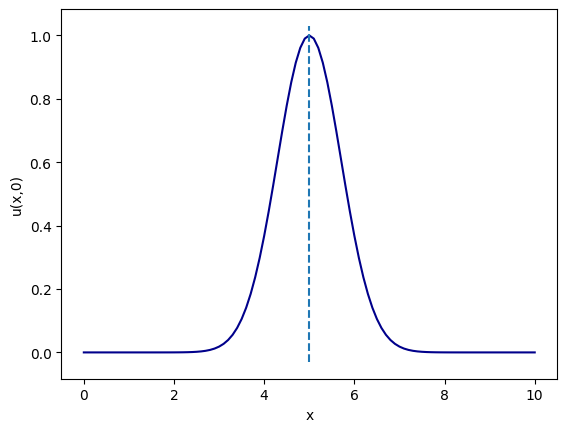

Space points = 101 
dx = 0.1
Time points = 401 
dt = 0.05
400.0


In [354]:
# SPACE
N = 101      # number of space points
xMin = 0
xMax = 10
dx = (xMax-xMin)/(N-1)
x0 = 5
x = np.linspace(xMin,xMax,N)
u0 = np.zeros(len(x))
for i in range(len(x)):
    u0[i] = np.exp(-(x[i]-x0)**2)          # initial function
plt.plot(x,u0, color='darkblue')
plt.xlabel('x')
plt.ylabel('u(x,0)')
plt.vlines(5,-0.03,1.03,linestyles='--')
#plt.savefig('./Homework_1/images/1_initial.png',dpi=150)
plt.show()
print('Space points =',len(x),'\ndx =',dx)

# TIME
T = 20.     # final time
cf = 0.5   # Courant factor
a = 1.
dt = round(cf*dx/a,5)
Nt = int(T/dt + 1)  # number of time intervals
print('Time points =',Nt,'\ndt =',dt)
print(T/dt)


400


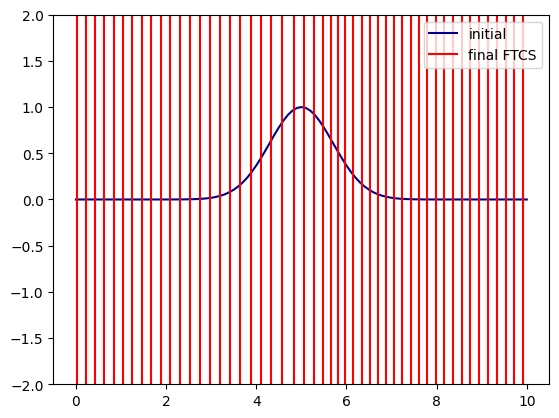

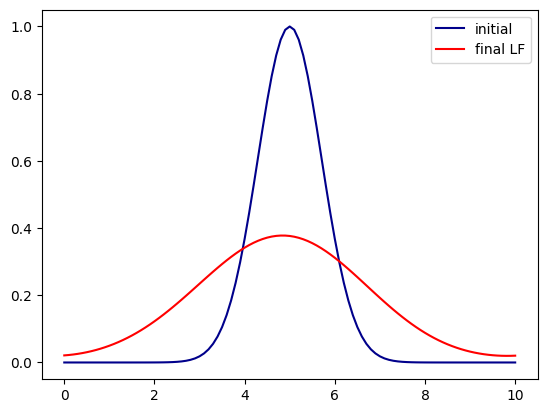

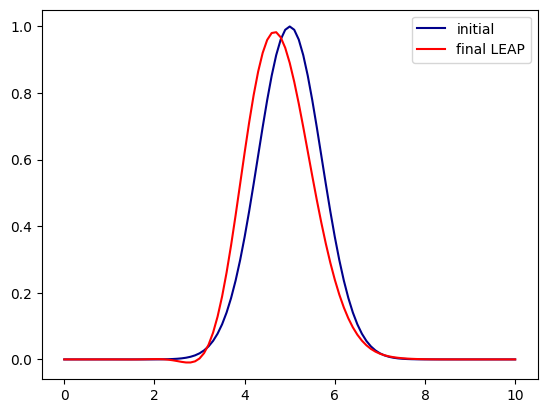

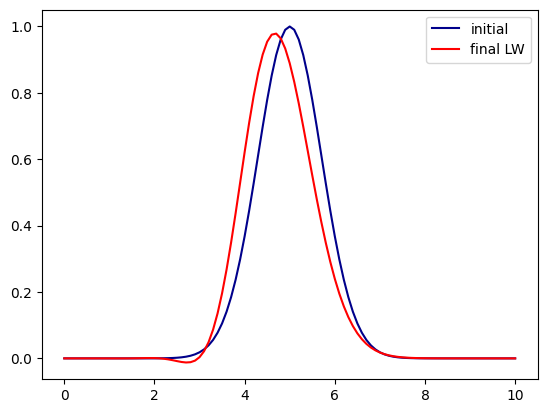

In [355]:
# EVOLUTION
u_current = np.zeros((4,len(u0)))
L2norm = np.zeros((4,int(T/dt)+1))

for i in range(4):
    u_current[i] = u0.copy()
    L2norm[i][0] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
u_next = u_current.copy()
const = a*dt/(2*dx)

# only for leapfrog
u_previous = u0.copy()

time = []
time.append(0)
t = 0
j = 0
k = 0

while t<T:
    j+=1
    # FTCS
    u_next[0] = u_current[0] - const*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1)) 
    
    # Lax-Friedrichs
    u_next[1] = 0.5*(np.roll(u_current[1],-1) + np.roll(u_current[1],+1)) - const*(np.roll(u_current[1],-1) - np.roll(u_current[1],+1))  
    
    # leapfrog
    if t==0:
        u_next[2] = 0.5*(np.roll(u_current[2],-1) + np.roll(u_current[2],+1)) - const*(np.roll(u_current[2], -1) - np.roll(u_current[2],+1))
    else:
        u_next[2] = u_previous - 2*const*(np.roll(u_current[2],-1) - np.roll(u_current[2],+1)) 
        u_previous = u_current[2].copy()  

    # Lax-Wendroff
    u_next[3] = u_current[3] - const*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(const**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3]) 
    
    for i in range(4):
        u_current[i] = u_next[i].copy()
        L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
    
    if (j-1)%50==60:
        k+=1
        plt.plot(x, u_current[0],color='y',label='FTCS')
        plt.plot(x, u_current[1],color='g',label='L-F')
        plt.plot(x, u_current[2],color='b',label='leapfrog')
        plt.plot(x, u_current[3],color='r',linestyle='--', linewidth=1.2, label='L-W')
        plt.title('Time='+str(round(t,2)))
        #plt.legend()
        plt.ylim(-0.3,1.3)
        #plt.savefig('./frames/fig_'+str(j).zfill(5)+'.png', dpi=200)
        #plt.close()
        #plt.savefig('./Homework_1/images/1_time_'+str(k)+'.png',dpi=150)
        plt.show()

    t = t+dt
    time.append(t)
print(j)

'''    
k+=1
plt.plot(x, u0, color='lightblue',label='initial')
plt.plot(x, u_current[0],color='y',label='FTCS')
plt.plot(x, u_current[1],color='g',label='L-F')
plt.plot(x, u_current[2],color='b',label='leapfrog')
plt.plot(x, u_current[3],color='r', linestyle='--', linewidth=1.2, label='L-W')
plt.title('Time='+str(round(t,1))+'  Cf='+str(cf))
plt.ylim(-0.3,1.3)
plt.legend()
#plt.savefig('./Homework_1/images/1_cf'+str(cf)+'.png',dpi=150)
plt.show()
        
'''        
methods = ['FTCS','LF','LEAP','LW']
for i in range(4):
    plt.plot(x,u0,color='darkblue',label='initial')
    plt.plot(x,u_current[i],color='r',label='final '+methods[i])
    if i==0:
        plt.ylim(-2,2)
    plt.legend()
#    plt.savefig('./Homework_1/images/1_cf1.2_'+methods[i]+'.png',dpi=150)
    plt.show()


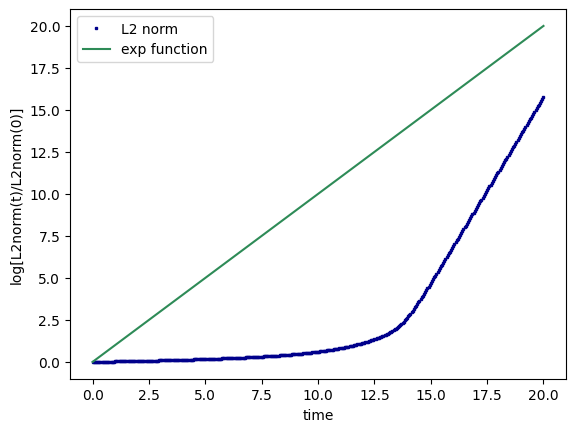

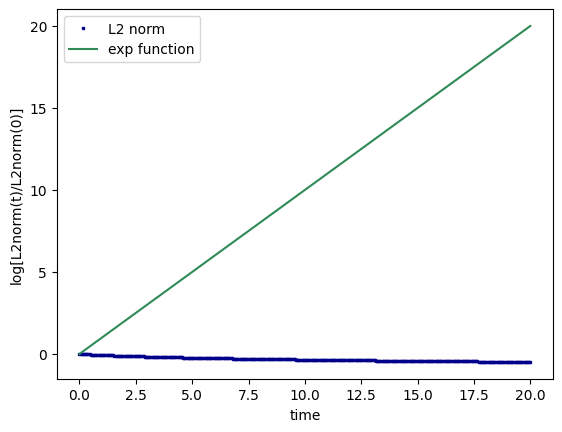

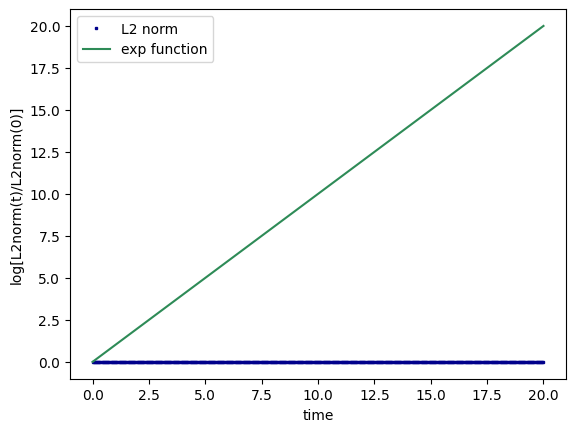

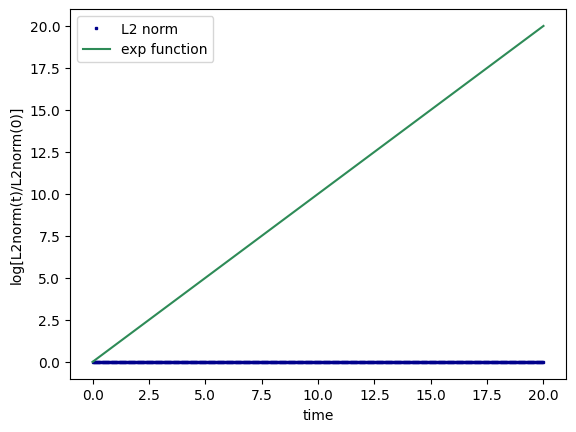

In [313]:
for i in range(4):
    plt.plot(time,np.log(L2norm[i,:]/L2norm[i,0]),'s',color='darkblue', markersize=2,label='L2 norm')
    plt.plot(time,time,color='seagreen',label='exp function')
    plt.xlabel('time')
    plt.ylabel('log[L2norm(t)/L2norm(0)]')
    plt.legend()
    #plt.savefig('./Homework_1/images/1_norm_exp_'+methods[i]+'.png')
    plt.show()

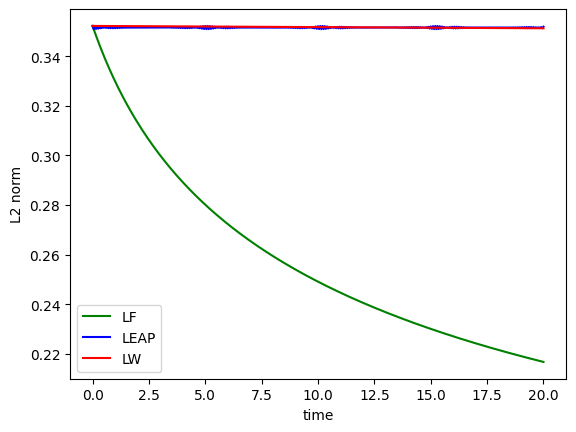

In [366]:
colors = ['y','g','b','r']
for i in range(1,4):
    plt.plot(time,L2norm[i,:], color=colors[i], label=methods[i])
    plt.xlabel('time')
    plt.ylabel('L2 norm')
plt.legend()
plt.savefig('./Homework_1/images/1_norm_compare.png')
plt.show()

## Change Cf

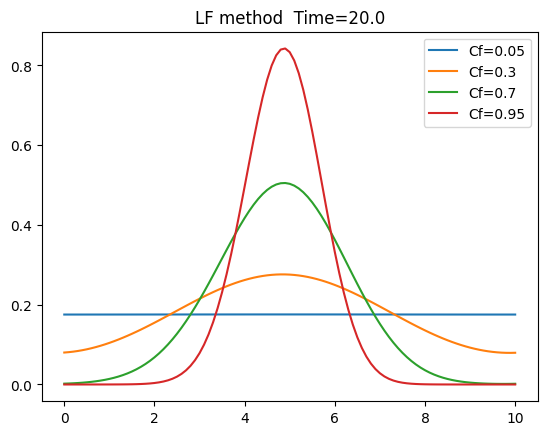

In [429]:
# EVOLUTION
#plt.plot(x,u0,color='k',label='initial')
J = 101
dx = 10/(J-1)
x = np.linspace(0,10,J)
u0 = np.zeros(len(x))
for i in range(len(x)):
    u0[i] = np.exp(-(x[i]-x0)**2) 
        
CF = [0.05,0.3,0.7,0.95]
for cf in CF:
    a = 1
    dt = cf*dx/a

    u_current = np.zeros((4,len(u0)))
    L2norm = np.zeros((4,int(T/dt)+2))

    for i in range(4):
        u_current[i] = u0.copy()
        L2norm[i][0] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
    u_next = u_current.copy()
    const = a*dt/(2*dx)

    # only for leapfrog
    u_previous = u0.copy()

    time = []
    time.append(0)
    t = 0
    j = 0
    k = 0

    while t<T:
        j+=1
        # FTCS
        u_next[0] = u_current[0] - const*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1)) 

        # Lax-Friedrichs
        u_next[1] = 0.5*(np.roll(u_current[1],-1) + np.roll(u_current[1],+1)) - const*(np.roll(u_current[1],-1) - np.roll(u_current[1],+1))  

        # leapfrog
        if t==0:
            u_next[2] = 0.5*(np.roll(u_current[2],-1) + np.roll(u_current[2],+1)) - const*(np.roll(u_current[2], -1) - np.roll(u_current[2],+1))
        else:
            u_next[2] = u_previous - 2*const*(np.roll(u_current[2],-1) - np.roll(u_current[2],+1)) 
            u_previous = u_current[2].copy()  

        # Lax-Wendroff
        u_next[3] = u_current[3] - const*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(const**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3]) 

        for i in range(4):
            u_current[i] = u_next[i].copy()
            L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))

        if (j-1)%50==60:
            k+=1
            plt.plot(x, u_current[0],color='y',label='FTCS')
            plt.plot(x, u_current[1],color='g',label='L-F')
            plt.plot(x, u_current[2],color='b',label='leapfrog')
            plt.plot(x, u_current[3],color='r',linestyle='--', linewidth=1.2, label='L-W')
            plt.title('Time='+str(round(t,2)))
            #plt.legend()
            plt.ylim(-0.3,1.3)
            #plt.savefig('./frames/fig_'+str(j).zfill(5)+'.png', dpi=200)
            #plt.close()
            #plt.savefig('./Homework_1/images/1_time_'+str(k)+'.png',dpi=150)
            plt.show()

        t = t+dt
        time.append(t)
    '''    
    print(j)
    k+=1
    plt.plot(x, u0, color='lightblue',label='initial')
    plt.plot(x, u_current[0],color='y',label='FTCS')
    plt.plot(x, u_current[1],color='g',label='L-F')
    plt.plot(x, u_current[2],color='b',label='leapfrog')
    plt.plot(x, u_current[3],color='r', linestyle='--', linewidth=1.2, label='L-W')
    plt.title('Time='+str(round(t,1))+'  Cf='+str(cf))
    plt.ylim(-0.3,1.3)
    plt.legend()
    #plt.savefig('./Homework_1/images/1_cf'+str(cf)+'.png',dpi=150)
    plt.show()

    '''        
    methods = ['FTCS','LF','LEAP','LW']
    i = 1
    plt.plot(x,u_current[i],label='Cf='+str(cf))
    #plt.plot(time,L2norm[i],label='Cf='+str(cf))
    if i==0:
        plt.ylim(-2,2)
    plt.legend()
    plt.title(str(methods[i])+' method  Time=20.0')
#plt.savefig('./Homework_1/images/1_cf_norm_'+methods[i]+'.png',dpi=150)
plt.show()


## Change J

/tmp/ipykernel_30288/581102566.py:45: RuntimeWarning: overflow encountered in subtract
  u_next[0] = u_current[0] - const*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1))
/tmp/ipykernel_30288/581102566.py:45: RuntimeWarning: invalid value encountered in subtract
  u_next[0] = u_current[0] - const*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1))


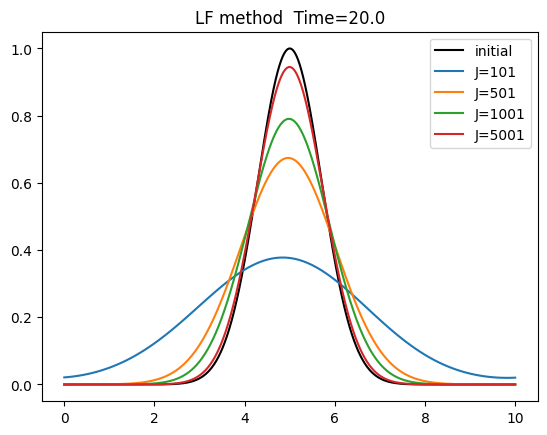

In [119]:
plt.plot(x,u0,color='k',label='initial')

J = [101,501,1001,5001]
for N in J:
    
    # SPACE
    xMin = 0
    xMax = 10
    dx = (xMax-xMin)/(N-1)
    x0 = 5
    x = np.linspace(xMin,xMax,N)
    u0 = np.zeros(len(x))
    for i in range(len(x)):
        u0[i] = np.exp(-(x[i]-x0)**2)          # initial function

    # TIME
    T = 20     # final time
    cf = 0.5   # Courant factor
    a = 1
    dt = cf*dx/a
    Nt = int(T/dt + 1)  # number of time intervals

    # EVOLUTION
    u_current = np.zeros((4,len(u0)))
    L2norm = np.zeros((4,int(T/dt)+1))

    for i in range(4):
        u_current[i] = u0.copy()
        L2norm[i][0] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
    u_next = u_current.copy()
    const = a*dt/(2*dx)

    # only for leapfrog
    u_previous = u0.copy()

    time = []
    time.append(0)
    t = 0
    j = 0
    k = 0

    while t<T:
        j+=1
        # FTCS
        u_next[0] = u_current[0] - const*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1)) 

        # Lax-Friedrichs
        u_next[1] = 0.5*(np.roll(u_current[1],-1) + np.roll(u_current[1],+1)) - const*(np.roll(u_current[1],-1) - np.roll(u_current[1],+1))  

        # leapfrog
        if t==0:
            u_next[2] = 0.5*(np.roll(u_current[2],-1) + np.roll(u_current[2],+1)) - const*(np.roll(u_current[2], -1) - np.roll(u_current[2],+1))
        else:
            u_next[2] = u_previous - 2*const*(np.roll(u_current[2],-1) - np.roll(u_current[2],+1)) 
            u_previous = u_current[2].copy()  

        # Lax-Wendroff
        u_next[3] = u_current[3] - const*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(const**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3]) 

        for i in range(4):
            u_current[i] = u_next[i].copy()
           # L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))

        if (j-1)%50==60:
            k+=1
            plt.plot(x, u_current[0],color='y',label='FTCS')
            plt.plot(x, u_current[1],color='g',label='L-F')
            plt.plot(x, u_current[2],color='b',label='leapfrog')
            plt.plot(x, u_current[3],color='r',linestyle='--', linewidth=1.2, label='L-W')
            plt.title('Time='+str(round(t,2)))
            #plt.legend()
            plt.ylim(-0.3,1.3)
            #plt.savefig('./frames/fig_'+str(j).zfill(5)+'.png', dpi=200)
            #plt.close()
            #plt.savefig('./Homework_1/images/1_time_'+str(k)+'.png',dpi=150)
            plt.show()

        t = t+dt
        time.append(t)
    '''    
    print(j)
    k+=1
    plt.plot(x, u0, color='lightblue',label='initial')
    plt.plot(x, u_current[0],color='y',label='FTCS')
    plt.plot(x, u_current[1],color='g',label='L-F')
    plt.plot(x, u_current[2],color='b',label='leapfrog')
    plt.plot(x, u_current[3],color='r', linestyle='--', linewidth=1.2, label='L-W')
    plt.title('Time='+str(round(t,1))+'  Cf='+str(cf))
    plt.ylim(-0.3,1.3)
    plt.legend()
    #plt.savefig('./Homework_1/images/1_cf'+str(cf)+'.png',dpi=150)
    plt.show()

    '''        
    methods = ['FTCS','LF','LEAP','LW']
    i = 1
    plt.plot(x,u_current[i],label='J='+str(N))
    if i==0:
        plt.ylim(-2,2)
    plt.legend()
    plt.title(str(methods[i])+' method  Time=20.0')
#plt.savefig('./Homework_1/images/1_J_'+methods[i]+'.png',dpi=150)
plt.show()


## Change Cf and J 

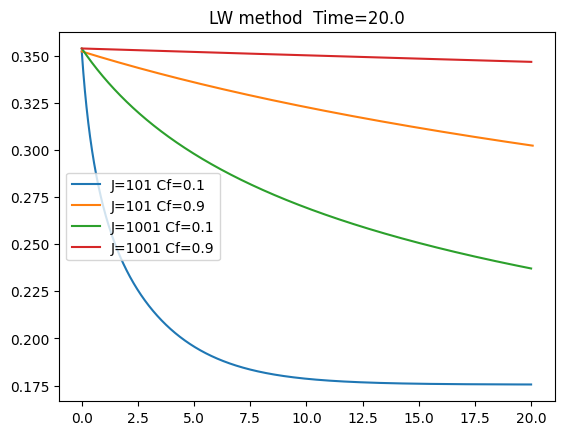

In [419]:
#plt.plot(x,u0,color='k',label='initial')

J = [101,1001]
CF = [0.1,0.9]
for N in J:
    for cf in CF:

        # SPACE
        xMin = 0
        xMax = 10
        dx = (xMax-xMin)/(N-1)
        x0 = 5
        x = np.linspace(xMin,xMax,N)
        u0 = np.zeros(len(x))
        for i in range(len(x)):
            u0[i] = np.exp(-(x[i]-x0)**2)          # initial function

        # TIME
        T = 20     # final time
        a = 1
        dt = cf*dx/a
        Nt = int(T/dt + 1)  # number of time intervals

        # EVOLUTION
        u_current = np.zeros((4,len(u0)))
        L2norm = np.zeros((4,int(T/dt)+1))
        normaa=[]
        

        for i in range(4):
            u_current[i] = u0.copy()
            L2norm[i][0] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
        u_next = u_current.copy()
        const = a*dt/(2*dx)
        normaa.append(np.sqrt(np.sum(u_current[1]**2)/len(u_current[1])))

        # only for leapfrog
        u_previous = u0.copy()

        time = []
        time.append(0)
        t = 0
        j = 0
        k = 0

        while t<T:
            j+=1
            # FTCS
            u_next[0] = u_current[0] - const*(np.roll(u_current[0],-1) - np.roll(u_current[0],+1)) 

            # Lax-Friedrichs
            u_next[1] = 0.5*(np.roll(u_current[1],-1) + np.roll(u_current[1],+1)) - const*(np.roll(u_current[1],-1) - np.roll(u_current[1],+1))  

            # leapfrog
            if t==0:
                u_next[2] = 0.5*(np.roll(u_current[2],-1) + np.roll(u_current[2],+1)) - const*(np.roll(u_current[2], -1) - np.roll(u_current[2],+1))
            else:
                u_next[2] = u_previous - 2*const*(np.roll(u_current[2],-1) - np.roll(u_current[2],+1)) 
                u_previous = u_current[2].copy()  

            # Lax-Wendroff
            u_next[3] = u_current[3] - const*(np.roll(u_current[3],-1) - np.roll(u_current[3],+1)) + 2*(const**2)*(np.roll(u_current[3],-1) + np.roll(u_current[3],+1) - 2*u_current[3]) 

            for i in range(4):
                u_current[i] = u_next[i].copy()
                #L2norm[i][j] = np.sqrt(np.sum(u_current[i]**2)/len(u_current[i]))
                if i ==1:
                    normaa.append(np.sqrt(np.sum(u_current[i]**2)/len(u_current[i])))
                    

            if (j-1)%50==60:
                k+=1
                plt.plot(x, u_current[0],color='y',label='FTCS')
                plt.plot(x, u_current[1],color='g',label='L-F')
                plt.plot(x, u_current[2],color='b',label='leapfrog')
                plt.plot(x, u_current[3],color='r',linestyle='--', linewidth=1.2, label='L-W')
                plt.title('Time='+str(round(t,2)))
                #plt.legend()
                plt.ylim(-0.3,1.3)
                #plt.savefig('./frames/fig_'+str(j).zfill(5)+'.png', dpi=200)
                #plt.close()
                #plt.savefig('./Homework_1/images/1_time_'+str(k)+'.png',dpi=150)
                plt.show()

            t = t+dt
            time.append(t)
        '''    
        print(j)
        k+=1
        plt.plot(x, u0, color='lightblue',label='initial')
        plt.plot(x, u_current[0],color='y',label='FTCS')
        plt.plot(x, u_current[1],color='g',label='L-F')
        plt.plot(x, u_current[2],color='b',label='leapfrog')
        plt.plot(x, u_current[3],color='r', linestyle='--', linewidth=1.2, label='L-W')
        plt.title('Time='+str(round(t,1))+'  Cf='+str(cf))
        plt.ylim(-0.3,1.3)
        plt.legend()
        #plt.savefig('./Homework_1/images/1_cf'+str(cf)+'.png',dpi=150)
        plt.show()

        '''        
        methods = ['FTCS','LF','LEAP','LW']
        i = 3
        #plt.plot(x,u_current[i],linestyle='--',label='J='+str(N)+' Cf='+str(cf))
        plt.plot(time,normaa,label='J='+str(N)+' Cf='+str(cf))
        if i==0:
            plt.ylim(-2,2)
        plt.legend()
        plt.title(str(methods[i])+' method  Time=20.0')
#plt.savefig('./Homework_1/images/1_cf_J_'+methods[i]+'.png',dpi=150)
plt.show()


In [6]:
import os

# set the directory where your images are stored
directory = "./frames/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)

import imageio
with imageio.get_writer('./video.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./frames/'+file)
        writer.append_data(image)
        
files=[]

['fig_00040.png', 'fig_00400.png', 'fig_00020.png', 'fig_00160.png', 'fig_00390.png', 'fig_00060.png', 'fig_00350.png', 'fig_00150.png', 'fig_00010.png', 'fig_00070.png', 'fig_00100.png', 'fig_00120.png', 'fig_00030.png', 'fig_00380.png', 'fig_00210.png', 'fig_00300.png', 'fig_00290.png', 'fig_00340.png', 'fig_00250.png', 'fig_00170.png', 'fig_00280.png', 'fig_00200.png', 'fig_00360.png', 'fig_00330.png', 'fig_00320.png', 'fig_00050.png', 'fig_00270.png', 'fig_00180.png', 'fig_00310.png', 'fig_00110.png', 'fig_00140.png', 'fig_00370.png', 'fig_00080.png', 'fig_00240.png', 'fig_00220.png', 'fig_00230.png', 'fig_00190.png', 'fig_00130.png', 'fig_00260.png', 'fig_00090.png'] 

['fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190

/tmp/ipykernel_54/229288163.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./frames/'+file)


In [7]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./video.mp4" type="video/mp4">
</video></div>""")

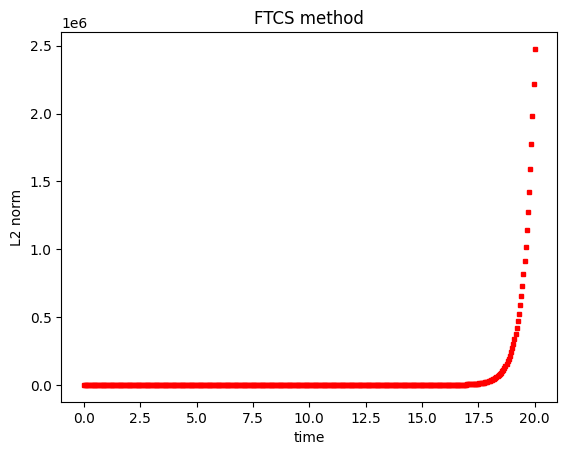

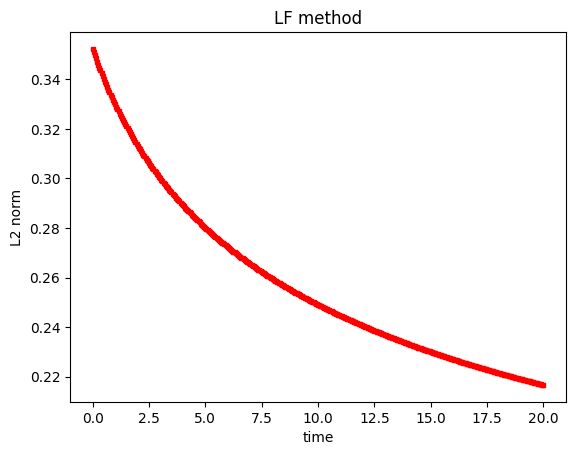

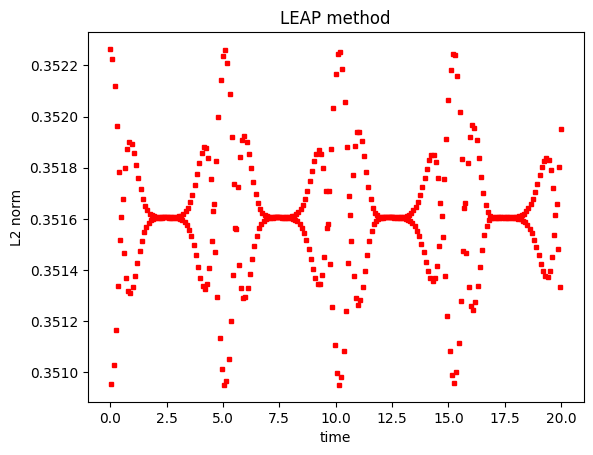

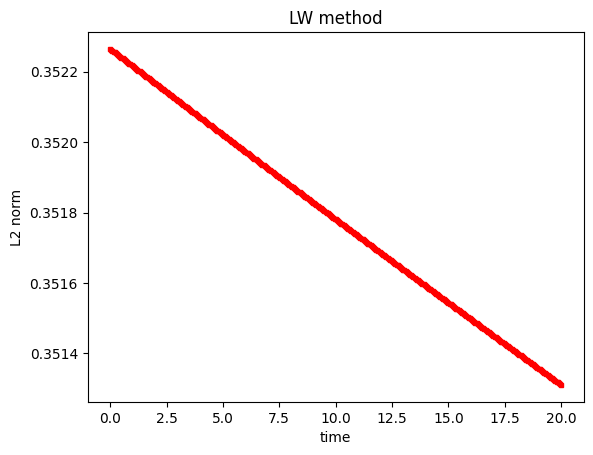

In [352]:
# L2 NORM PLOT
L2norm_N = np.zeros(len(L2norm[0,:]))
for j in range(len(L2norm_N)):
    L2norm_N[j] = L2norm[2][j] * L2norm[2][0]
for i in range(4):
    if i==22:       
        plt.plot(time,L2norm_N,'s',markersize=3,color='r')
    else:
        plt.plot(time,L2norm[i],'s',markersize=3,color='r')
    #plt.plot(tm[i],norm[i],'+',color='b')
    plt.xlabel('time')
    plt.ylabel('L2 norm')
    plt.title(methods[i]+' method')
    #plt.savefig('./Homework_1/images/1_l2norm_'+methods[i]+'.png',dpi=150)
    plt.show()

/tmp/ipykernel_30288/2144228192.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(v,1/v)        # LF


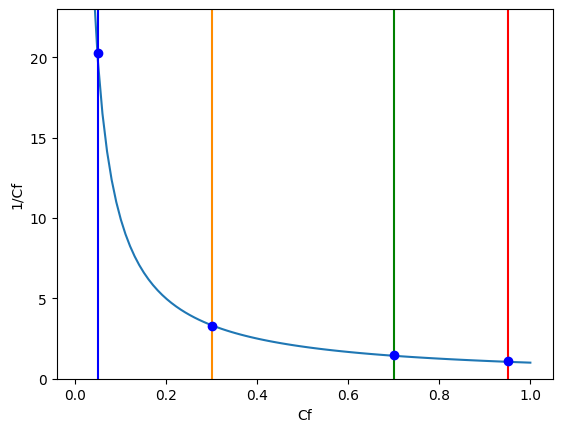

In [450]:
v = np.linspace(0,1,100)
#plt.plot(v,v*(1-v**2)) # LW
plt.plot(v,1/v)        # LF
topp = 23
plt.vlines(0.05,0,topp,color='b')
plt.vlines(0.3,0,topp,color='darkorange')
plt.vlines(0.7,0,topp, color='g')
plt.vlines(0.95,0,topp,color='r')

plt.xlabel('Cf')
plt.ylabel('1/Cf')#(1-Cf^2)')
plt.plot(0.05,20.3,'o',color='b')
plt.plot(0.3,3.3,'o',color='b')
plt.plot(0.7,1.5,'o',color='b')
plt.plot(0.95,1.1,'o',color='b')
plt.ylim(0,topp)
plt.savefig('./Homework_1/images/1_normCf_LF.png',dpi=150)
plt.show()